In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set the mean and covariance
mean1 = [0, 0]
mean2 = [2, 0]
cov1 = [[1, .7], [.7, 1]]
cov2 = [[.5, .4], [.4, .5]]

# Generate data from the mean and covariance
data1 = np.random.multivariate_normal(mean1, cov1, size=1000)
data2 = np.random.multivariate_normal(mean2, cov2, size=1000)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


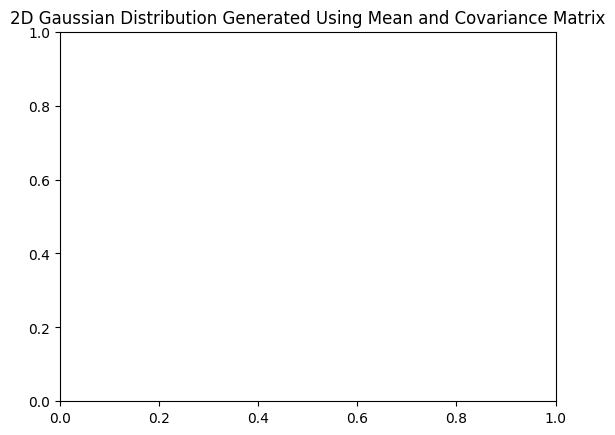

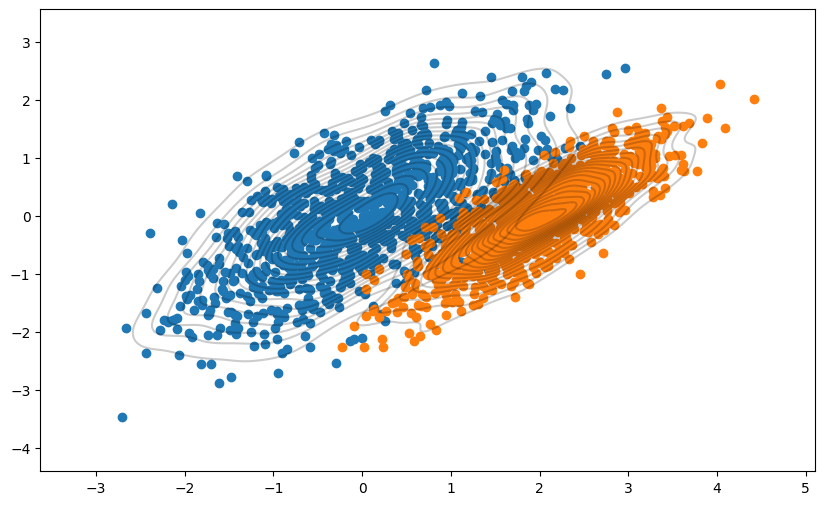

In [9]:
plt.title('2D Gaussian Distribution Generated Using Mean and Covariance Matrix')
plt.figure(figsize=(10,6))
plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])

sns.kdeplot(x=data1[:, 0], y=data1[:, 1], levels=20, linewidth=1, color='k', alpha=0.2)
sns.kdeplot(x=data2[:, 0], y=data2[:, 1], levels=20, linewidth=1, color='k', alpha=0.2)

plt.grid(False)
plt.show()